# Lab 10  - Root Finding and Optimization


In this activity, we will examine both root finding and optimization methods useful in computation

In [1]:
#import required functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Activity 1: Root finding with Bisection

below we have defined a function that performs bisection method for finding roots. Take a moment to review the code and verify that it works as expected.

In [2]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Find root of f(x) using bisection method.
    
    Parameters:
        f: function to find root of
        a, b: interval [a,b] where f(a) and f(b) have opposite signs
        tol: tolerance for convergence
        max_iter: maximum number of iterations
    
    Returns:
        root approximation and number of iterations
    """
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iterations
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    
    return (a + b) / 2, iterations

Define a function that we will use to test the code above

In [3]:
# Define a test function 
def f(x):
    return x**3 - 2*x - 5

Use the function to find the root of the function

In [4]:
# use function
root_bisect, iter_bisect = bisection_method(f, 1, 3)

#print results
print(f"Root found: x = {root_bisect:.10f}")
print(f"f(x) = {f(root_bisect):.2e}")
print(f"Iterations: {iter_bisect}")

Root found: x = 2.0945520401
f(x) = 6.23e-06
Iterations: 20


Check our answer with `scipy.optimize.fsolve()`. Note fsolve requires an initial guess, we'll put $x_0 = 1 $ as a 'reasonable' guess. 

In [5]:
#initial guess
x0=1

#run scipy.optimize fsolve on our funciton with the initial guess
fs_result=fsolve(f,x0)

#print result
print(f"fsolve result for root: {fs_result[0]:.3f}")

fsolve result for root: 2.095


We can also take a look at the result by plotting. Let's do that as a way of verifying the found root.

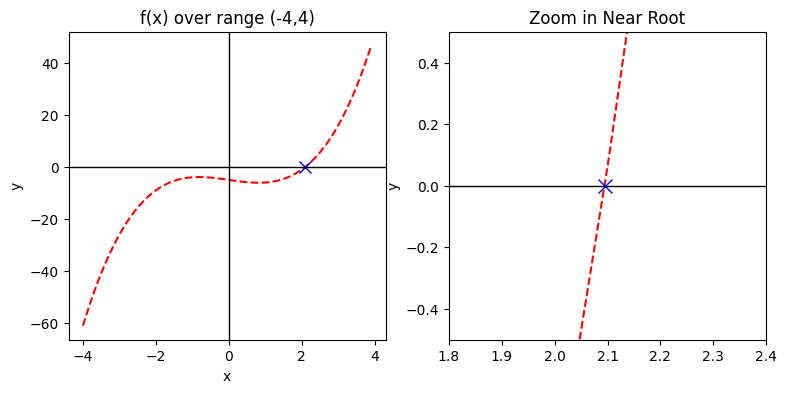

In [6]:
#create x values to feed our function
xs=np.arange(-4,4.,0.1)

#evalute function
ys=f(xs)

#create plot
fig,ax =plt.subplots(nrows=1, ncols=2,figsize=(9,4))

#title
ax[0].set_title("f(x) over range (-4,4)")

#plot function
ax[0].plot(xs,ys,'r--')

#plot a marker at our found root to verify
ax[0].plot(root_bisect,0,'bx',ms=8)

#add slolid line for x and y axis
ax[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
ax[0].axvline(x=0, color='black', linestyle='-', linewidth=1)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")


#make zoom in plot
ax[1].set_title("Zoom in Near Root")

#plot function
ax[1].plot(xs,ys,'r--')

#plot a marker at our found root to verify
ax[1].plot(root_bisect,0,'bx',ms=10)

#add slolid line for x and y axis
ax[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
ax[1].axvline(x=0, color='black', linestyle='-', linewidth=1)

#set zoom in region
ax[1].set_xlim(1.8, 2.4)
ax[1].set_ylim(-0.5,0.5)

ax[1].set_ylabel("y")


plt.show()

### Activity 2: Root Finding with Newton-Raphson

below we have defined a function that performs the Newton-Raphson method for finding roots. Take a moment to review the code and verify that it works as expected.

In [7]:
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    """
    Find root of f(x) using Newton-Raphson method.
    
    Parameters:
        f: function to find root of
        f_prime: derivative of f
        x0: initial guess
        tol: tolerance for convergence
        max_iter: maximum number of iterations
    
    Returns:
        root approximation and number of iterations
    """
    x = x0
    iterations = 0
    
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, iterations
        
        fpx = f_prime(x)
        if fpx == 0:
            raise ValueError("Derivative is zero. Newton-Raphson fails.")
        
        x = x - fx / fpx
        iterations += 1
    
    return x, iterations

For this exercise, let's use the same function as in activity 1. Recall it was: $f(x) = x^3 - 2x - 5$. Newton-Raphson requires knowledge of the first derivative, which we can create below: 

In [8]:
def f_prime(x):
    return 3*x**2-2

Now use our function to find the root:

In [9]:
#use the newton_raphson() function
root_newton, iter_newton = newton_raphson(f, f_prime, 1.0)

print(f"Root found: x = {root_newton:.10f}")
print(f"f(x) = {f(root_newton):.2e}")
print(f"Iterations: {iter_newton}")

Root found: x = 2.0945514816
f(x) = 2.44e-10
Iterations: 8


Notice how much faster this converges to the desired result!

### Activity 3: Optimization with Gradient Descent

Recall our discussion of Gradient Desent as a method for finding extrema for a given function. Below we have defined a function that performs this method in the 1D case. Take a moment to examine the code and verify that it works as expected. 

In [10]:
def gradient_descent(f, f_prime, x0, learning_rate=0.1, tol=1e-6, max_iter=1000):
    """
    Find minimum of f(x) using gradient descent.
    
    Parameters:
        f: function to minimize
        f_prime: derivative of f
        x0: initial guess
        learning_rate: step size for updates
        tol: tolerance for convergence
        max_iter: maximum number of iterations
    
    Returns:
        minimum location, function value, and number of iterations
    """
    x = x0
    iterations = 0
    history = [x]
    
    for i in range(max_iter):
        grad = f_prime(x)
        x_new = x - learning_rate * grad
        history.append(x_new)
        
        if abs(x_new - x) < tol:
            return x_new, f(x_new), iterations, history
        
        x = x_new
        iterations += 1
    
    return x, f(x), iterations, history

For our optimization functions, let's consider a different function we'll call $g(x)$. We'll go ahead and define derivatives as needed for this part as well. 

In [12]:
# Define a test function for optimization: g(x) = x^2 - 4x + 4 (minimum at x=2)
def g(x):
    return x**2 - 4*x + 4

def g_prime(x):
    return 2*x - 4

def g_double_prime(x):
    return 2

Perform function and print result:

In [13]:
min_gd, fmin_gd, iter_gd, hist_gd = gradient_descent(g, g_prime, 5.0, learning_rate=0.3)
print(f"Minimum at: x = {min_gd:.10f}")
print(f"Function value: g(x) = {fmin_gd:.10f}")
print(f"Iterations: {iter_gd}")

Minimum at: x = 2.0000005154
Function value: g(x) = 0.0000000000
Iterations: 16


We can check this result via one of two methods: 1. Analytic calculation (if function is differentiable) 2. Graphing

Let's do both starting with the Analytic calculation. Recall extrema are defined where $g'(x)$ = 0. So let's look a this as a type of 'root finding' problem and call fsolve() on $g'(x)$

In [14]:
#state an initial guess
x0 = 0.0

fs_result=fsolve(g_prime,x0)

#print result
print(f"fsolve result for optimization: {fs_result[0]:.3f}")

fsolve result for optimization: 2.000


And now for plotting!

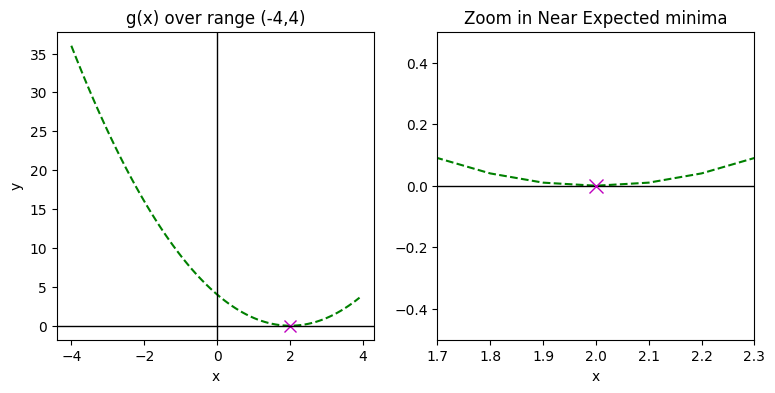

In [15]:
#create x values to feed our function
xs=np.arange(-4,4.,0.1)

#evalute function
ys=g(xs)

#create plot
fig,ax =plt.subplots(nrows=1, ncols=2,figsize=(9,4))

#title
ax[0].set_title("g(x) over range (-4,4)")

#plot function
ax[0].plot(xs,ys,'g--')

#plot a marker at our found minimum point to verify
ax[0].plot(min_gd,0,'mx',ms=8)

#add slolid line for x and y axis
ax[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
ax[0].axvline(x=0, color='black', linestyle='-', linewidth=1)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")


#make zoom in plot
ax[1].set_title("Zoom in Near Expected minima")

#plot function
ax[1].plot(xs,ys,'g--')

#add slolid line for x and y axis
ax[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
ax[1].axvline(x=0, color='black', linestyle='-', linewidth=1)

#set zoom in region
ax[1].set_xlim(1.7, 2.3)
ax[1].set_ylim(-0.5,0.5)

#set xlabel/ylabel
ax[1].set_xlabel("x")

#plot a marker at our found minimum point to verify
ax[1].plot(min_gd,0,'mx',ms=10)

plt.show()

### Activity 4: Optimization with Newton's Method

Below we have created an optimization function that uses Newton's Method. Take a moment to examine the code, and verify it performs the expected computation. 

In [16]:
def newton_optimization(f, f_prime, f_double_prime, x0, tol=1e-6, max_iter=100):
    """
    Find minimum of f(x) using Newton's method.
    
    Parameters:
        f: function to minimize
        f_prime: first derivative
        f_double_prime: second derivative
        x0: initial guess
        tol: tolerance for convergence
        max_iter: maximum number of iterations
    
    Returns:
        minimum location, function value, and number of iterations
    """
    x = x0
    iterations = 0
    
    for i in range(max_iter):
        fpx = f_prime(x)
        fppx = f_double_prime(x)
        
        if abs(fpx) < tol:
            return x, f(x), iterations
        
        if fppx == 0:
            raise ValueError("Second derivative is zero.")
        
        x = x - fpx / fppx
        iterations += 1
    
    return x, f(x), iterations

For this activity, we will use the same function as the earlier example: $g(x)=x^2 - 4x +4$

Use the Newton Optimization function to find the minimum value.

In [17]:
#call function on g(x)
min_newton, fmin_newton, iter_newton_opt = newton_optimization(g, g_prime, g_double_prime, 5.0)

#print results
print(f"Minimum at: x = {min_newton:.10f}")
print(f"Function value: g(x) = {fmin_newton:.10f}")
print(f"Iterations: {iter_newton_opt}")

Minimum at: x = 2.0000000000
Function value: g(x) = 0.0000000000
Iterations: 1


Notice how quickly this converges to the same result!

### Activity 5: Multi-Dimensional Example - Rosenbrock Function

The Rosenbrock function is a commonly used example function in multidimensional optimization. It is defined as:
$$
f(x,y) = (a-x)^2 + b(y-x)^2
$$
A visualization is included below showing the case of $a=1, b=100$, which has a minimum at the point $(1,1)$.

![](https://upload.wikimedia.org/wikipedia/commons/6/68/Rosenbrock-contour.svg)

Below we have defined the Rosenbrock Function as described above, along with its derivatives, which will be needed for our optimization functions. 

In [18]:
# Define function
def rosenbrock(x):
    """Rosenbrock function with a = 1, b = 100"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Grad representative of 1st derivatives
def rosenbrock_grad(x):
    """Gradient of Rosenbrock function."""
    dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dy = 200*(x[1] - x[0]**2)
    return np.array([dx, dy])

# Hessian representative of 2nd derivatives
def rosenbrock_hessian(x):
    """Hessian matrix of Rosenbrock function."""
    h11 = 2 - 400*x[1] + 1200*x[0]**2
    h12 = -400*x[0]
    h21 = -400*x[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

Now we will define a couple of the methods discussed earlier, but adapting them to multideminsional cases. Let's start with Gradent Descent.

In [19]:
def gradient_descent_nd(f, grad_f, x0, learning_rate=0.01, tol=1e-6, max_iter=10000):
    """
    Gradient descent for multidimensional functions.
    
    Parameters:
        f: objective function
        grad_f: gradient function
        x0: initial point (numpy array)
        learning_rate: step size
        tol: convergence tolerance
        max_iter: maximum iterations
    
    Returns:
        minimum point, function value, iterations, and path history
    """
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        history.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            return x_new, f(x_new), i, np.array(history)
        
        x = x_new
    
    return x, f(x), max_iter, np.array(history)

Run our ND Gradient Descent function on Rosenbrock and print the result:

In [34]:
# define initial guess
x0_rosen = np.array([-1.3, 0.5])

# run function
min_rosen_gd, fmin_rosen_gd, iter_rosen_gd, path_rosen_gd = gradient_descent_nd(
    rosenbrock, rosenbrock_grad, x0_rosen, learning_rate=0.001, max_iter=10000
)
print(f"Starting point: ({x0_rosen[0]:.2f}, {x0_rosen[1]:.2f})")
print(f"Minimum found at: ({min_rosen_gd[0]:.6f}, {min_rosen_gd[1]:.6f})")
print(f"Function value: {fmin_rosen_gd:.10f}")
print(f"Iterations: {iter_rosen_gd}")
print(f"True minimum: (1.0, 1.0), f = 0.0")

Starting point: (-1.30, 0.50)
Minimum found at: (0.993114, 0.986247)
Function value: 0.0000474998
Iterations: 10000
True minimum: (1.0, 1.0), f = 0.0


The result is pretty close to the desired value!

Now let's look at a implementation of Newton's method to compare with the above result. 

In [35]:
def newton_nd(f, grad_f, hess_f, x0, tol=1e-6, max_iter=100):
    """
    Newton's method for multidimensional optimization.
    
    Parameters:
        f: objective function
        grad_f: gradient function
        hess_f: Hessian matrix function
        x0: initial point
        tol: convergence tolerance
        max_iter: maximum iterations
    
    Returns:
        minimum point, function value, iterations, and path history
    """
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for i in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)
        
        if np.linalg.norm(grad) < tol:
            return x, f(x), i, np.array(history)
        
        # Solve H * delta_x = -grad
        try:
            delta_x = np.linalg.solve(hess, -grad)
            x_new = x + delta_x
            history.append(x_new.copy())
            x = x_new
        except np.linalg.LinAlgError:
            print("Singular Hessian matrix")
            return x, f(x), i, np.array(history)
    
    return x, f(x), max_iter, np.array(history)

Run our ND Newton's Method function on Rosenbrock and print the result:

In [36]:
# intial guess
x0_rosen_newton = np.array([-1.3, 0.5])

#run function
min_rosen_newton, fmin_rosen_newton, iter_rosen_newton, path_rosen_newton = newton_nd(
    rosenbrock, rosenbrock_grad, rosenbrock_hessian, x0_rosen_newton)

#print results
print(f"Starting point: ({x0_rosen_newton[0]:.2f}, {x0_rosen_newton[1]:.2f})")
print(f"Minimum found at: ({min_rosen_newton[0]:.6f}, {min_rosen_newton[1]:.6f})")
print(f"Function value: {fmin_rosen_newton:.10f}")
print(f"Iterations: {iter_rosen_newton}")

Starting point: (-1.30, 0.50)
Minimum found at: (1.000000, 1.000000)
Function value: 0.0000000000
Iterations: 5


Notice how much faster this converges compared to Gradient Descent! It is a huge advantage to use the 2nd derivative if it is well behaved!

Let's look at a plot to better understand these results

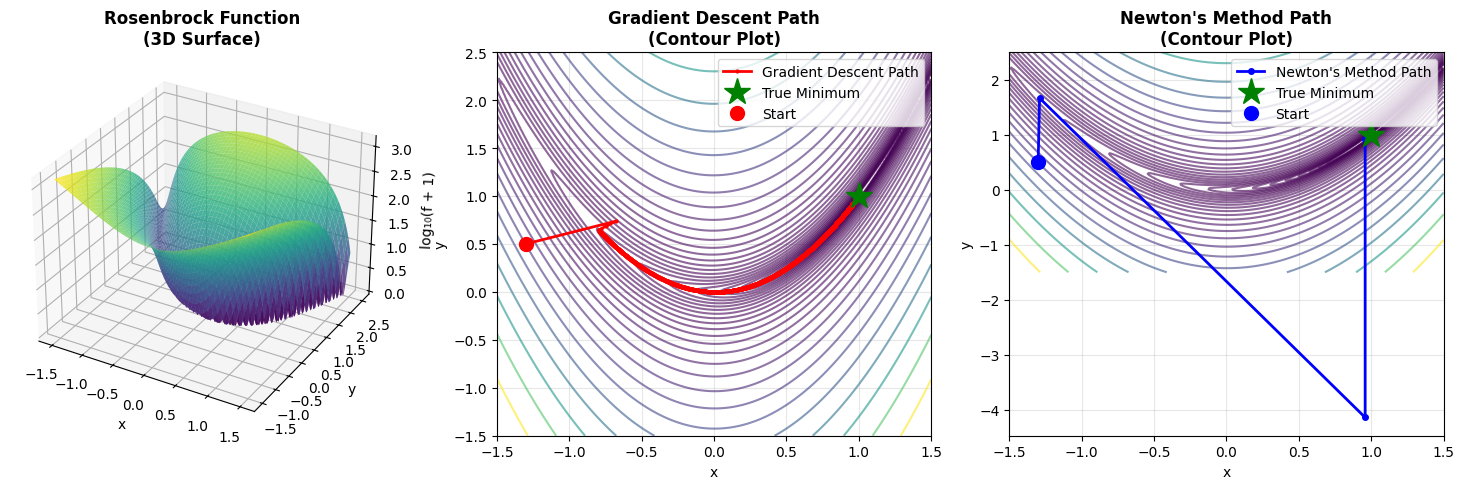

In [37]:
fig1 = plt.figure(figsize=(15, 5))

# Create meshgrid for contour plot
x_range = np.linspace(-1.5, 1.5, 200)
y_range = np.linspace(-1.5, 2.5, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rosenbrock([X[i, j], Y[i, j]])

# Plot 1: 3D Surface
ax1 = fig1.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, np.log10(Z + 1), cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('log₁₀(f + 1)')
ax1.set_title('Rosenbrock Function\n(3D Surface)', fontweight='bold')

# Plot 2: Contour with Gradient Descent path
ax2 = fig1.add_subplot(132)
contour_levels = np.logspace(-1, 3, 30)
cs = ax2.contour(X, Y, Z, levels=contour_levels, cmap='viridis', alpha=0.6)
ax2.plot(path_rosen_gd[:, 0], path_rosen_gd[:, 1], 'r.-', linewidth=2, 
         markersize=4, label='Gradient Descent Path')
ax2.plot(1, 1, 'g*', markersize=20, label='True Minimum')
ax2.plot(x0_rosen[0], x0_rosen[1], 'ro', markersize=10, label='Start')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Gradient Descent Path\n(Contour Plot)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 2.5)

# Plot 3: Contour with Newton's Method path
ax3 = fig1.add_subplot(133)
cs = ax3.contour(X, Y, Z, levels=contour_levels, cmap='viridis', alpha=0.6)
ax3.plot(path_rosen_newton[:, 0], path_rosen_newton[:, 1], 'b.-', 
         linewidth=2, markersize=8, label="Newton's Method Path")
ax3.plot(1, 1, 'g*', markersize=20, label='True Minimum')
ax3.plot(x0_rosen_newton[0], x0_rosen_newton[1], 'bo', markersize=10, label='Start')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title("Newton's Method Path\n(Contour Plot)", fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Notice how Gradient Decent follows a relatively smooth path to the minimum, while Netwon's method is more jagged. If you take a moment to think about this, this demonstrates why noisy data can be dangerous in Newton's approach. 

As an addendum to this activity, try returning to the cells above and try an different intial guess to see how these functions perform relative to one another. 

### Activity 6: Multi-Dimensional Example - Mass Spring System

In this activity, we will look at a mass spring system similar to one we've studied in the past with 2 masses and 3 springs

![](https://www.researchgate.net/profile/Graham-Wood-2/publication/303598579/figure/fig1/AS:416829198618624@1476391233548/Mass-spring-model-of-a-2-DOF-system-consisting-of-two-coupled-resonators.png)

In [38]:
def spring_potential(x):
    """
    Potential energy of a two-mass spring system.
    x = [x1, x2] are positions of two masses.
    Three springs: wall-mass1, mass1-mass2, mass2-wall
    Spring constants: k1=1, k2=2, kc=1
    Equilibrium positions: 0, 2, 4
    """
    k1, k2, kc = 1.0, 2.0, 1.0
    x1, x2 = x[0], x[1]
    
    # Energy from each spring (1/2 k x²)
    E1 = 0.5 * k1 * (x1 - 0)**2      # wall to mass 1
    E2 = 0.5 * k2 * (x2 - x1 - 2)**2  # mass 1 to mass 2 (rest length = 2)
    E3 = 0.5 * kc * (4 - x2)**2      # mass 2 to wall
    
    return E1 + E2 + E3

def spring_potential_grad(x):
    """Gradient of spring potential energy."""
    k1, k2, kc = 1.0, 2.0, 1.0
    x1, x2 = x[0], x[1]
    
    dx1 = k1*(x1 - 0) - k2*(x2 - x1 - 2)
    dx2 = k2*(x2 - x1 - 2) - kc*(4 - x2)
    
    return np.array([dx1, dx2])

Now we consider this as an optimization problem where we minimize the energy to find the equilibirum position. 

In [39]:
#Start with initial guess
x0_spring = np.array([0.0, 1.5])

#run Gradient Descent
min_spring, fmin_spring, iter_spring, path_spring = gradient_descent_nd(
    spring_potential, spring_potential_grad, x0_spring, learning_rate=0.1)

#print results
print(f"Initial positions: x1={x0_spring[0]:.2f}, x2={x0_spring[1]:.2f}")
print(f"Equilibrium positions: x1={min_spring[0]:.6f}, x2={min_spring[1]:.6f}")
print(f"Minimum potential energy: {fmin_spring:.6f}")
print(f"Iterations: {iter_spring}")

Initial positions: x1=0.00, x2=1.50
Equilibrium positions: x1=0.799994, x2=3.199994
Minimum potential energy: 0.800000
Iterations: 115


Create a plot to visualize the situation

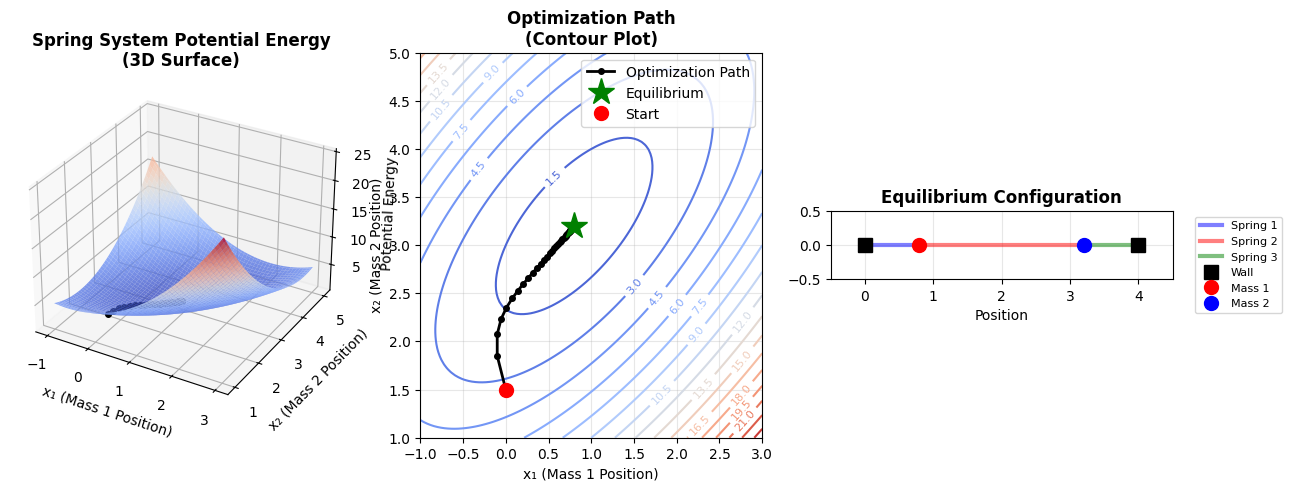

In [40]:
fig2 = plt.figure(figsize=(15, 5))

# Create meshgrid for spring potential
x1_range = np.linspace(-1, 3, 100)
x2_range = np.linspace(1, 5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z_spring = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z_spring[i, j] = spring_potential([X1[i, j], X2[i, j]])

# Plot 1: 3D Surface
ax1 = fig2.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X1, X2, Z_spring, cmap='coolwarm', alpha=0.8)
ax1.plot(path_spring[:, 0], path_spring[:, 1], 
         [spring_potential(p) for p in path_spring], 
         'ko-', linewidth=2, markersize=4, label='Optimization Path')
ax1.set_xlabel('x₁ (Mass 1 Position)')
ax1.set_ylabel('x₂ (Mass 2 Position)')
ax1.set_zlabel('Potential Energy')
ax1.set_title('Spring System Potential Energy\n(3D Surface)', fontweight='bold')

# Plot 2: Contour with optimization path
ax2 = fig2.add_subplot(132)
cs = ax2.contour(X1, X2, Z_spring, levels=20, cmap='coolwarm')
ax2.clabel(cs, inline=True, fontsize=8)
ax2.plot(path_spring[:, 0], path_spring[:, 1], 'ko-', linewidth=2, 
         markersize=4, label='Optimization Path')
ax2.plot(min_spring[0], min_spring[1], 'g*', markersize=20, label='Equilibrium')
ax2.plot(x0_spring[0], x0_spring[1], 'ro', markersize=10, label='Start')
ax2.set_xlabel('x₁ (Mass 1 Position)')
ax2.set_ylabel('x₂ (Mass 2 Position)')
ax2.set_title('Optimization Path\n(Contour Plot)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Physical representation
ax3 = fig2.add_subplot(133)
ax3.plot([0, min_spring[0]], [0, 0], 'b-', linewidth=3, label='Spring 1',alpha=0.5)
ax3.plot([min_spring[0], min_spring[1]], [0, 0], 'r-', linewidth=3, label='Spring 2',alpha=0.5)
ax3.plot([min_spring[1], 4], [0, 0], 'g-', linewidth=3, label='Spring 3',alpha=0.5)
ax3.plot([0], [0], 'ks', markersize=10, label='Wall')
ax3.plot([min_spring[0]], [0], 'ro', markersize=10, label='Mass 1')
ax3.plot([min_spring[1]], [0], 'bo', markersize=10, label='Mass 2')
ax3.plot([4], [0], 'ks', markersize=10)
ax3.set_xlim(-0.5, 4.5)
ax3.set_ylim(-0.5, 0.5)
ax3.set_xlabel('Position')
ax3.set_title('Equilibrium Configuration', fontweight='bold')
#ax3.legend(loc='upper right', fontsize=8)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)

ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

#plt.tight_layout()
plt.show()

Try re-running the above cells with different start positons for the masses. See how the algorith takes changes, but we still converge to a similar solution. 

You can also try changing values of masses and spring constants for different versions of this same type of problem. 